In [1]:
import numpy as np
import scipy.stats as st
import numpy.random as npr
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import array
%matplotlib inline
import random

Part - A

H0: for every plant that Mendel grew, there is a 75% chance that it will have purple flowers.    
H1: for every plant the Mendel grew, the chance of the plant having purple flowers is greater than 75%.

purple plants expected = 705                                                   
purple plants after testing = 705+32 = 737

In [2]:
flowers = ['purple']*737
white = ['white']*184
flowers.extend(white)
random.shuffle(flowers)
flowers[700:710]

['purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'white',
 'purple',
 'purple',
 'purple',
 'purple']

In [3]:
sides = ["purple", "white"]
plants = np.array(sides)
outcome = np.random.choice(plants,929)
column_values = ['Flower']
df = pd.DataFrame(data = outcome,columns = column_values) 
print(df)

     Flower
0     white
1    purple
2    purple
3    purple
4     white
..      ...
924   white
925   white
926   white
927   white
928   white

[929 rows x 1 columns]


In [4]:
purple_count = df[df["Flower"]  == 'purple'].count()
print("Purple flowers count is :")
purple_count

Purple flowers count is :


Flower    429
dtype: int64

In [5]:
white_count = df[df["Flower"]  == 'white'].count()
print("White flowers count is :")
white_count

White flowers count is :


Flower    500
dtype: int64

In [6]:
total_flowers = df["Flower"].count()
print("Total Flower count :", total_flowers)

Total Flower count : 929


In [7]:
observed_proportion = purple_count/total_flowers
observed_proportion

Flower    0.461787
dtype: float64

In [8]:
observed_statistic = abs(observed_proportion - 0.75)
observed_statistic

Flower    0.288213
dtype: float64

In [9]:
model_colors = ['purple', 'purple', 'purple', 'white']
new_sample = np.random.choice(model_colors, total_flowers)

In [10]:
proportion_purple = np.count_nonzero(new_sample == 'purple')/total_flowers
print("Proportion of purple-flowers in this new sample which differs from 0.75 is", abs(proportion_purple - 0.75))

Proportion of purple-flowers in this new sample which differs from 0.75 is 0.0034983853606027626


In [11]:
repetitions = 5000
for i in range(repetitions):
    sim = npr.binomial(total_flowers, 0.75, repetitions)    
sim

array([690, 704, 695, ..., 718, 691, 721])

In [12]:
panel_df = pd.DataFrame(sim)
panel_df.head(3)

,0
0,690
1,704
2,695


In [13]:
df = pd.DataFrame(sim, columns =['Count'])

df['sampled_stats']= (df['Count'] / 929)
df = df.set_index('Count')
df['Distance from 0.75'] = abs(df['sampled_stats'] - 0.75)

df.head()

,sampled_stats,Distance from 0.75
Count,,
690,0.742734,0.007266
704,0.757804,0.007804
695,0.748116,0.001884
688,0.740581,0.009419
680,0.731970,0.018030


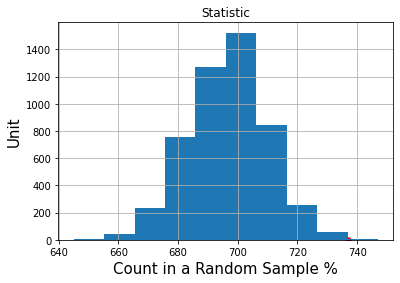

In [14]:
panel_df.hist()
plt.title('Statistic');
plt.xlabel('Count in a Random Sample %',fontsize=15)
plt.ylabel('Unit',fontsize=15);
plt.scatter(737, 0, color='red', s=30)

In [15]:
# Reject null hypothesis

Part - B

Carry out a hypothesis test for “mean” of a population. The population standard deviation is
13.46, and the test is for a “mean” different from 60. Given: a sample size of 30, with “sample
mean” 65.10. Consider alpha = 0.05. Demonstrate your solution using either the critical-value or
p-value method.

In [16]:
#H0 : μ=60, H1 : μ!=60
n = 30
xbar = 65.10
mu = 60
s = 13.46
alpha = 0.05

In [17]:
# test statics
z = (xbar-mu)/(s/np.sqrt(n))
z

2.075323211943792

In [18]:
# p-value
p_val = (1 - st.norm.cdf(abs(z))) * 2
p_val

0.03795658956990633

In [19]:
if (p_val > alpha):
    print("Null hypothesis cannot be rejected")
else:
    print("Reject null hypothesis")

Reject null hypothesis
